# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


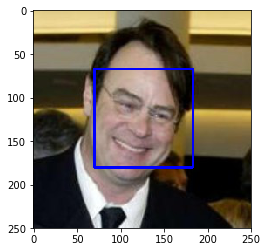

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

face_vector = np.vectorize(face_detector)
human_face = face_vector(human_files_short)
dog_face = face_vector(dog_files_short)


dog_perform = (sum(dog_face)/len(dog_face))*100
human_perform = (sum(human_face)/len(human_face))*100
print('Performance for dog is {}% and human is {}%'.format(dog_perform, human_perform))
# print(dog_perform)
# ## on the images in human_files_short and dog_files_short.


Performance for dog is 17.0% and human is 98.0%


In [5]:
print('Performance for dog is {}% and human is {}%'.format(dog_perform, human_perform))

Performance for dog is 17.0% and human is 98.0%


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [6]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [7]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:05<00:00, 94669215.28it/s] 


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [8]:
from PIL import Image
import torchvision.transforms as transforms

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.

    image = Image.open(img_path)
    data_transform = transforms.Compose([
                        transforms.RandomResizedCrop(224),
                        transforms.RandomHorizontalFlip(),
                        transforms.RandomRotation(30),
                        transforms.ToTensor(),  
                        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])
    
    image_tensor = data_transform(image)
    image_tensor = image_tensor.unsqueeze_(0)

    if use_cuda:
        image_tensor = image_tensor.cuda()
    
    # running tensor through VGG16    
    image_tensor = VGG16(image_tensor)
    
    # Returns a Tensor of shape
    prediction_tensor = image_tensor.cpu().data.numpy().argmax()
    
    return  prediction_tensor # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [9]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    class_index = VGG16_predict(img_path)
    
    if class_index >= 151 and class_index <= 268:
        return True
    else:
        return False

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 
   3% Dogs are detected in human file and 78% dogs have been detected in dog file
  

In [10]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
total_human_files = len(human_files_short)
total_dog_files = len(dog_files_short)

correct_human = 0;
for i in range(0, total_human_files-1):
    if(dog_detector(human_files_short[i])==False):
        correct_human +=1
        
correct_dogs = 0;
for k in range(0, total_dog_files-1):
    if(dog_detector(dog_files_short[k])==True):
        correct_dogs +=1
        
#print(correct_dogs)
#print(total_dog_files_s)
print('Dog in human files {}% '.format(100-(correct_human/total_human_files)*100))
print('Dog in dog files {}% '.format((correct_dogs/total_dog_files)*100))

Dog in human files 3.0% 
Dog in dog files 78.0% 


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [11]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [12]:
import os
from torchvision import datasets, utils

### TODO: Write data loaders for training, validation, and test sets

batch_size = 20 
num_workers = 0 
size = 224 

data_dir = '/data/dog_images/'
train_dir = os.path.join(data_dir, 'train/')
valid_dir = os.path.join(data_dir, 'valid/')
test_dir = os.path.join(data_dir, 'test/')

standard_normalization = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])


transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(30),    
    transforms.RandomResizedCrop(size), 
    transforms.ToTensor(),
    standard_normalization
    ])

transform_valid = transforms.Compose([
    transforms.Resize(size),
    transforms.CenterCrop(size),
    transforms.ToTensor(),
    standard_normalization
    ])
 
transform_test = transforms.Compose([
       transforms.Resize((224,224)),
       transforms.ToTensor(),
       standard_normalization
    ])


train_data = datasets.ImageFolder(train_dir, transform=transform_train)
valid_data = datasets.ImageFolder(valid_dir, transform=transform_valid)
test_data = datasets.ImageFolder(test_dir , transform=transform_test)

train_loader = torch.utils.data.DataLoader(train_data, 
                                           batch_size=batch_size,
                                           num_workers=num_workers, 
                                           shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, 
                                           batch_size=batch_size,
                                           num_workers=num_workers, 
                                           shuffle=False)
test_loader = torch.utils.data.DataLoader(test_data,  
                                          batch_size=batch_size, 
                                          shuffle=False,
                                          num_workers=num_workers)

loaders_scratch = {
    'train': train_loader,
    'valid': valid_loader,
    'test': test_loader
}

# Step Seven - Check the size of the dataset and Loaders
print("Size of Train Dataset = " + str(len(train_data)))
print("Size of Valid Dataset = " + str(len(valid_data)))
print("Size of Test Dataset = " + str(len(test_data)))
print("\n*********** \n")
print("Length of Train Loader - "  + str(len(train_loader)))
print("Length of Valid Loader - "  + str(len(valid_loader)))
print("Length of Test Loader - "  + str(len(test_loader)))

Size of Train Dataset = 6680
Size of Valid Dataset = 835
Size of Test Dataset = 836

*********** 

Length of Train Loader - 334
Length of Valid Loader - 42
Length of Test Loader - 42


**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:  The image is resized using RandomResizedCrop, which resizes the image into fixed size of 224 (although I haven't scaled it on any aspect ratio/scale but simply resized)and transforms to tensor.

Yes, I have augmented the dataset by using RandomHorizontalFlip and RandomRotation of 10 degrees to make sure that the data are versatile and more in number which also helps to mimick the real world.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [13]:
import torch.nn as nn
import torch.nn.functional as F

num_classes = 133 # total classes of dog breeds
dropout = nn.Dropout(0.3) # dropout layer (p=0.3)

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()

        self.conv1 = nn.Conv2d( 3, 16, 3)

        
        self.bn1 = nn.BatchNorm2d(16)
        
        
        self.conv2 = nn.Conv2d(16, 32, 3)
        
        
        self.bn2 = nn.BatchNorm2d(32)
        
        
        self.conv3 = nn.Conv2d(32, 64, 3)
        
        self.bn3 = nn.BatchNorm2d(64)
        
        
        self.conv4 = nn.Conv2d(64, 128, 3)
        self.bn4 = nn.BatchNorm2d(128)
       
        self.conv5 = nn.Conv2d(128, 256, 3)
        self.bn5 = nn.BatchNorm2d(256)
        
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2) 
        
       
        self.fc1 = nn.Linear( 5*5*256 , 500)
        
        
        self.fc2 = nn.Linear(500, num_classes) # Output

        self.dropout = dropout
    
    def forward(self, x):
        
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
                
        x = self.pool(F.relu(self.conv2(x)))
        
        x = self.pool(F.relu(self.conv3(x)))
       
        x = self.pool(F.relu(self.conv4(x)))
        
        x = self.pool(F.relu(self.conv5(x)))

        x = x.view(-1, 5 * 5 * 256)

        x = F.relu(self.fc1(x))

        x = self.fc2(x)
        
        return x

#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()
    
    
print(model_scratch)

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (bn5): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=6400, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=133, bias=True)
  (dropout): Dropout(p=0.3)
)


__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ Here I have used 5 convolutional layers with 2 fully connected layers, kernel size 3x3and padding & stride = 1 for the input. RELU activation function is used in order to avoid the problem of vanishing gradient. Batch normalization is performed after each convolution. Drop out probability of 0.3 is selected in order to avoid overfitting the network.  The network is designed as:

Input image: 224x224x3

Convolution Layer 1 (3,16): Converts 224x224x3 tensor into 222x222x16 i.e takes input channel =3 and gives output = 16. Max pooling is done to convert the output of 1st conv layer to 111x111x16. Max pooling is done after every convolutional layer to reduce the dimensionality so as to reduce the computations.

Convolution Layer 2 (16, 32): Converts 111x111x16 tensor into 109x109x32 i.e takes input channel =16 and gives output = 32. Max pooling is done to convert the output of 1st conv layer to 54x54x32.

Convolution Layer 3 (32, 64):Converts 54x54x32 tensor into 52x52x64 i.e takes input channel = 32 and gives output = 64. Max pooling is done to convert the output of 1st conv layer to 26x26x64.

Convolution Layer 4 (64, 128):Converts 26x26x64 tensor into 24x24x128 i.e takes input channel =64 and gives output = 128. Max pooling is done to convert the output of 1st conv layer to 12x12x128.

Convolution Layer 5 (128, 256):Converts 12x12x128 tensor into 10x10x256 i.e takes input channel =128 and gives output = 256. Max pooling is done to convert the output of 1st conv layer to 5x5x256.

1st Fully connected layer: Linearizes the output of the preceeding maxpooling layer and converts 5x5x256 tensor to 500 channels.

2nd Fully Connected layer/Last layer: Converts input 500 channels to 133 output channels to classify the dog breeds.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [14]:

import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.05)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [15]:
# the following import is required for training to be robust to truncated images
from PIL import ImageFile
import time
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    
    for epoch in range(1, n_epochs+1):
        train_loss = 0.0
        valid_loss = 0.0
        start_time = time.time()

        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()

            optimizer.zero_grad()
            output = model(data)
            
            loss = criterion(output, target)
            loss.backward()
            
            optimizer.step() 
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            if batch_idx % 100 == 0:
                print('Batch %d, Loss: %.6f' %
                  (batch_idx + 1, train_loss))
                
        ######################    
        # validate the model #
        ######################

        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
                
            output = model(data)

            loss = criterion(output, target)
            
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
            
        print('\n Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f} \ttook: {:.2f}s'.format(
            epoch, 
            train_loss, 
            valid_loss, 
            time.time() - start_time
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ... \n'.format(
                    valid_loss_min,
                    valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
        
    # return trained model
    return model

n_epochs = 50

model_scratch = train(n_epochs, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

Batch 1, Loss: 4.877687
Batch 101, Loss: 4.889966
Batch 201, Loss: 4.887327
Batch 301, Loss: 4.883433

 Epoch: 1 	Training Loss: 4.882021 	Validation Loss: 4.857207 	took: 116.15s
Validation loss decreased (inf --> 4.857207).  Saving model ... 

Batch 1, Loss: 4.954946
Batch 101, Loss: 4.825532
Batch 201, Loss: 4.801157
Batch 301, Loss: 4.788520

 Epoch: 2 	Training Loss: 4.784717 	Validation Loss: 4.747865 	took: 99.88s
Validation loss decreased (4.857207 --> 4.747865).  Saving model ... 

Batch 1, Loss: 4.712440
Batch 101, Loss: 4.742422
Batch 201, Loss: 4.732687
Batch 301, Loss: 4.732896

 Epoch: 3 	Training Loss: 4.729853 	Validation Loss: 4.680572 	took: 100.97s
Validation loss decreased (4.747865 --> 4.680572).  Saving model ... 

Batch 1, Loss: 4.658745
Batch 101, Loss: 4.690894
Batch 201, Loss: 4.682212
Batch 301, Loss: 4.666137

 Epoch: 4 	Training Loss: 4.659817 	Validation Loss: 4.485455 	took: 100.30s
Validation loss decreased (4.680572 --> 4.485455).  Saving model ... 

Ba

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [16]:
def test(loaders, model, criterion, use_cuda):
    
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        output = model(data)

        loss = criterion(output, target)
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        
        pred = output.data.max(1, keepdim=True)[1]

        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.135316


Test Accuracy: 27% (231/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [17]:
## TODO: Specify data loaders
loaders_transfer = loaders_scratch.copy()

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [19]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model_transfer = models.resnet50(pretrained=True)

for param in model_transfer.parameters():
    param.requires_grad = False
    
no_inputs = model_transfer.fc.in_features
output_layer = nn.Linear(no_inputs, 133, bias=True)

model_transfer.fc = output_layer
    
for param in  model_transfer.fc.parameters():
    param.require_grad = True

print(model_transfer)

if use_cuda:
    model_transfer = model_transfer.cuda()

133
#################
ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1),

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ Here I have used ResNet50 (A 50 layer Residual Network) model to apply transfer learning. The model is pretrained on Imagenet and the architecture involves average pooling in the last layer (As we can see in the above cell) followed by linear conversion of input channel to 133 feature output of dog breed.

ResNet50 is very popular architecture which has been performing amazingly well in the recent years since it won Imagenet competition in 2015 and when sony broke the training record on Imagenet. Since ResNet50 is trained in trained in diverse objects, it is suitable for our current problem to accurately identify the dog breeds. Also it solves the vanishing gradient problem and prevents overfitting.
Some useful articles that helped me to choose ResNet 50 are: https://towardsdatascience.com/deep-learning-using-transfer-learning-python-code-for-resnet50-8acdfb3a2d38
,
https://towardsdatascience.com/transfer-learning-using-pytorch-4c3475f4495



### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [20]:
import torch.optim as optim

### TODO: select loss function
criterion_transfer = nn.CrossEntropyLoss()

optimizer_transfer = optim.SGD(filter(lambda p: p.requires_grad,model_transfer.parameters()), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [24]:
# train the model
model_transfer = train(35, loaders_transfer, model_transfer, optimizer_transfer, 
                       criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Batch 1, Loss: 4.895030
Batch 101, Loss: 4.903357
Batch 201, Loss: 4.868609
Batch 301, Loss: 4.837446

 Epoch: 1 	Training Loss: 4.827003 	Validation Loss: 4.671009 	took: 104.40s
Validation loss decreased (inf --> 4.671009).  Saving model ... 

Batch 1, Loss: 4.690252
Batch 101, Loss: 4.682566
Batch 201, Loss: 4.651019
Batch 301, Loss: 4.631055

 Epoch: 2 	Training Loss: 4.622960 	Validation Loss: 4.441032 	took: 105.18s
Validation loss decreased (4.671009 --> 4.441032).  Saving model ... 

Batch 1, Loss: 4.359426
Batch 101, Loss: 4.514909
Batch 201, Loss: 4.485140
Batch 301, Loss: 4.461584

 Epoch: 3 	Training Loss: 4.453858 	Validation Loss: 4.226704 	took: 104.05s
Validation loss decreased (4.441032 --> 4.226704).  Saving model ... 

Batch 1, Loss: 4.409636
Batch 101, Loss: 4.335273
Batch 201, Loss: 4.302269
Batch 301, Loss: 4.289725

 Epoch: 4 	Training Loss: 4.281978 	Validation Loss: 4.015075 	took: 105.21s
Validation loss decreased (4.226704 --> 4.015075).  Saving model ... 

B

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [26]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.277270


Test Accuracy: 78% (659/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [27]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in loaders_transfer['train'].dataset.classes]

from PIL import Image
import torchvision.transforms as transforms

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    
    img=Image.open(img_path)
    
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

    transform = transforms.Compose([
       transforms.Resize((224,224)),
       transforms.ToTensor(),
       normalize
    ])

    img_tensor = transform(img)
    img_tensor.unsqueeze_(0)

    if use_cuda: 
        img_tensor = img_tensor.cuda()
       
    output = model_transfer(img_tensor)
    
    _, prediction = torch.max(output.data,1)

    breed_name = class_names[prediction-1]
    
    # Return the breed_name for the given image
    return breed_name

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [32]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    img = Image.open(img_path)
    plt.imshow(img)
    plt.show()
    if(face_detector(img_path)):
        print("Hooman detected")
#         print("The picture is mistakenly classified as {}".format(predicted_class))
    elif(dog_detector(img_path)):
        print("Doggo detected woof woof")
        prediction = predict_breed_transfer(img_path)
        print("Doggo belongs to breed: {0}".format(prediction))  
    else:
        print("Douhh! What's that ?")

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

I think the output can be improved in many levels, few points that can be improved are:

i) Using different loss function might improve the accuracy

ii) Large dataset would have helped but it would have definitely spiked up the training time

iii) Tuning the hyperparameters would help. However, tuning up the learnining rates, batch size and optimizers again and again is definitely painful but a worthy one.

In [33]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.
def testpath(path):
    test_figure = np.array(glob(path))
    test_figure_path = [i for i in test_figure]
    #print(len(test_figure_path))

    # suggested code, below
    fig = plt.figure()
    fig_index = 0
    print(len(test_figure_path))
    for i in range(len(test_figure_path)):

        file = test_figure_path[i]
        pred = run_app(file)

        fig_index += 1

        img=np.asarray(Image.open(file))

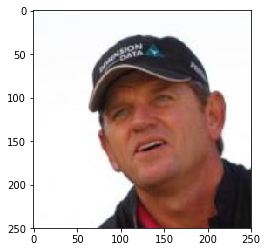

Hooman detected


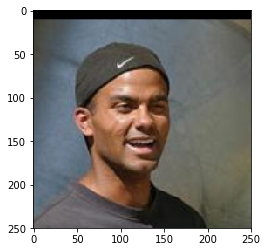

Hooman detected


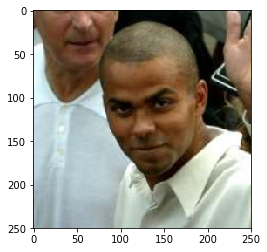

Hooman detected


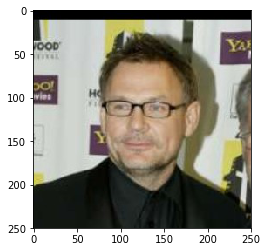

Hooman detected


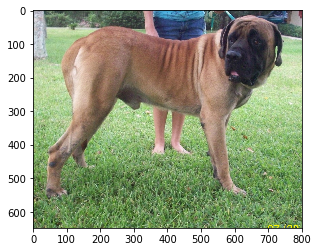

Doggo detected woof woof
Doggo belongs to breed: Bulldog


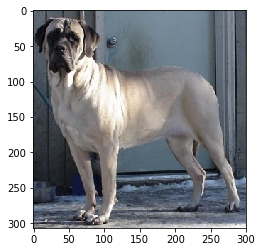

Douhh! What's that ?


In [35]:
for file in np.hstack((human_files[66:70], dog_files[:2])):
    run_app(file)